In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error,  mean_absolute_percentage_error

# BNB_Coin

Import data

In [2]:

file_path = "D:/Dữ liệu kinh doanh/DoAn/ptdl/IS403_O22_HTCL_12/Dataset/BNB Historical Data.csv"
BNBCoin = pd.read_csv(file_path)


In [3]:
print(BNBCoin)

            Date   Price    Open    High     Low     Vol. Change %
0     06/01/2024  601.80  593.80  608.19  593.20  161.02K    1.35%
1     05/31/2024  593.80  594.99  598.89  590.10  175.98K   -0.20%
2     05/30/2024  594.99  595.69  601.80  586.60  233.89K   -0.10%
3     05/29/2024  595.59  601.69  603.59  593.29  219.96K   -1.01%
4     05/28/2024  601.69  603.80  605.48  594.29  294.76K   -0.35%
...          ...     ...     ...     ...     ...      ...      ...
1915  03/05/2019   13.65   11.40   13.74   11.40    8.34M   19.61%
1916  03/04/2019   11.41   11.45   11.51   10.88    2.74M   -0.29%
1917  03/03/2019   11.45   11.75   11.86   11.20    2.86M   -2.58%
1918  03/02/2019   11.75   11.35   11.80   10.83    3.89M    3.56%
1919  03/01/2019   11.35   10.27   11.55   10.24    4.02M   10.45%

[1920 rows x 7 columns]


Convert Date from String to data


In [4]:
BNBCoin['Date'] = pd.to_datetime(BNBCoin['Date'])
BNBCoin.sort_values('Date', inplace=True)

In [5]:
BNBCoin

,Date,Price,Open,High,Low,Vol.,Change %
1919,2019-03-01,11.35,10.27,11.55,10.24,4.02M,10.45%
1918,2019-03-02,11.75,11.35,11.80,10.83,3.89M,3.56%
1917,2019-03-03,11.45,11.75,11.86,11.20,2.86M,-2.58%
1916,2019-03-04,11.41,11.45,11.51,10.88,2.74M,-0.29%
1915,2019-03-05,13.65,11.40,13.74,11.40,8.34M,19.61%
...,...,...,...,...,...,...,...
4,2024-05-28,601.69,603.80,605.48,594.29,294.76K,-0.35%
3,2024-05-29,595.59,601.69,603.59,593.29,219.96K,-1.01%
2,2024-05-30,594.99,595.69,601.80,586.60,233.89K,-0.10%
1,2024-05-31,593.80,594.99,598.89,590.10,175.98K,-0.20%


## Devide data 8:2

In [6]:
train_data_BNB = BNBCoin[:int(0.8*len(BNBCoin))]
test_data_BNB = BNBCoin[int(0.8*len(BNBCoin)):]
model_BNBcoin_82 = auto_arima(train_data_BNB['Price'], start_p=1, start_q=1,
                   max_p=5, max_q=5,   # m là chu kỳ mùa vụ, ở đây là mỗi năm
                   start_P=0, seasonal=False,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

model_BNBcoin_82.fit(train_data_BNB['Price'])

# Prediction data file test
predictions_BNBcoin_82 = model_BNBcoin_82.predict(n_periods=len(test_data_BNB))



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12451.411, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12484.823, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12454.038, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12458.745, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12483.119, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12447.667, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12448.884, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=12447.955, Time=0.36 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12437.076, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12444.937, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=12449.650, Time=0.82 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=12437.794, Time=1.01 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12445.618, Time=0.66 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=12426.624, Time=1.08 sec
 ARIMA(4,1,3)(0,0,0

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Prediction 30 days

In [7]:
future_dates_BNBcoin_30days_82 = pd.date_range(start=BNBCoin['Date'].max(), periods=31, freq='D')[1:]
future_data_BNBcoin_30days_82 = pd.DataFrame({'Date': future_dates_BNBcoin_30days_82})
predictions_BNBcoin_30days_82 = model_BNBcoin_82.predict(n_periods=30)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


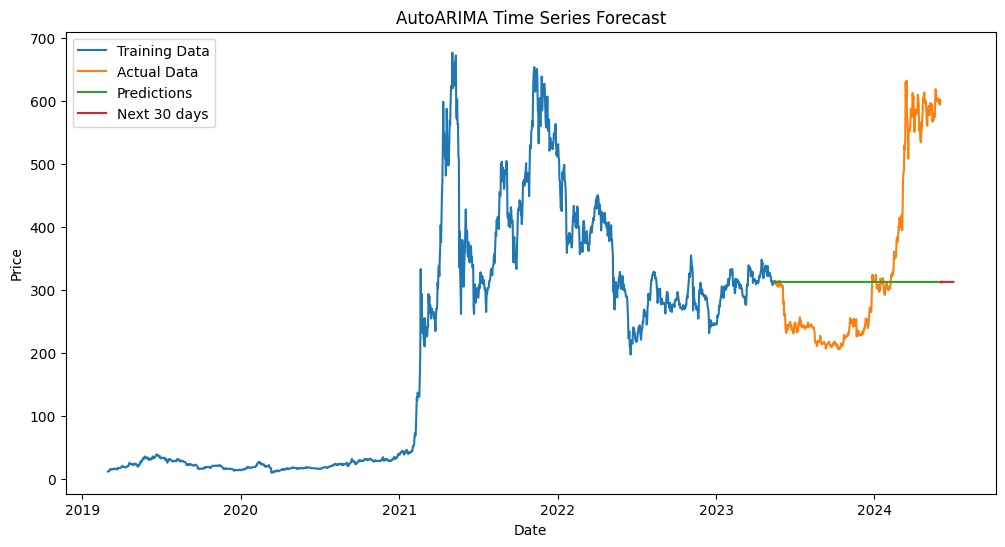

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_BNB['Date'],train_data_BNB['Price'], label='Training Data')
plt.plot(test_data_BNB['Date'], test_data_BNB['Price'], label='Actual Data')
plt.plot(test_data_BNB['Date'], predictions_BNBcoin_82, label='Predictions')
plt.plot(future_data_BNBcoin_30days_82, predictions_BNBcoin_30days_82, label='Next 30 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Prediction 60 days

In [9]:
future_dates_BNBcoin_60days_82 = pd.date_range(start=BNBCoin['Date'].max(), periods=61, freq='D')[1:]
future_data_BNBcoin_60days_82 = pd.DataFrame({'Date': future_dates_BNBcoin_60days_82})
predictions_BNBcoin_60days_82 = model_BNBcoin_82.predict(n_periods=60)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


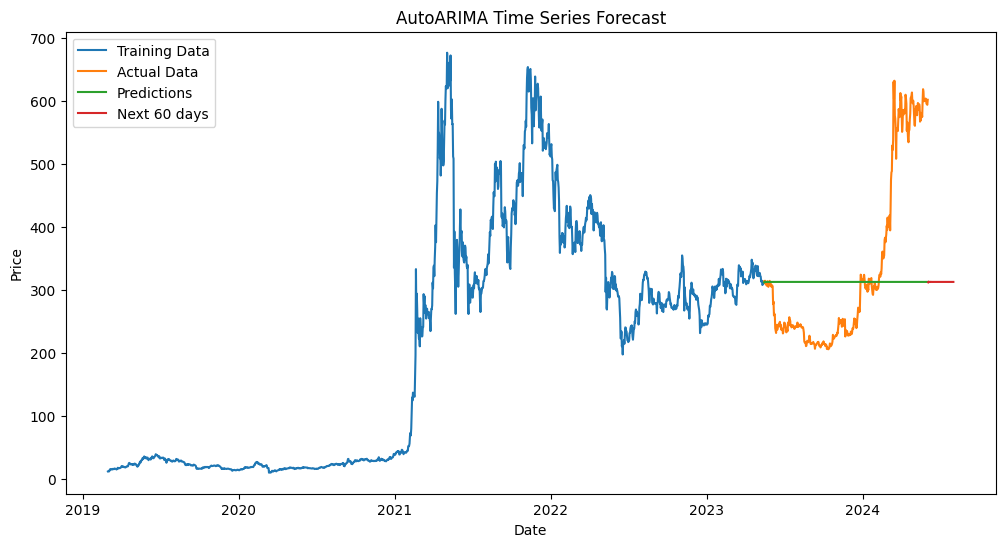

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_BNB['Date'],train_data_BNB['Price'], label='Training Data')
plt.plot(test_data_BNB['Date'], test_data_BNB['Price'], label='Actual Data')
plt.plot(test_data_BNB['Date'], predictions_BNBcoin_82, label='Predictions')
plt.plot(future_data_BNBcoin_60days_82, predictions_BNBcoin_60days_82, label='Next 60 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Prediction 90 days

In [11]:
future_dates_BNBcoin_90days_82 = pd.date_range(start=BNBCoin['Date'].max(), periods=91, freq='D')[1:]
future_data_BNBcoin_90days_82 = pd.DataFrame({'Date': future_dates_BNBcoin_90days_82})
predictions_BNBcoin_90days_82 = model_BNBcoin_82.predict(n_periods=90)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


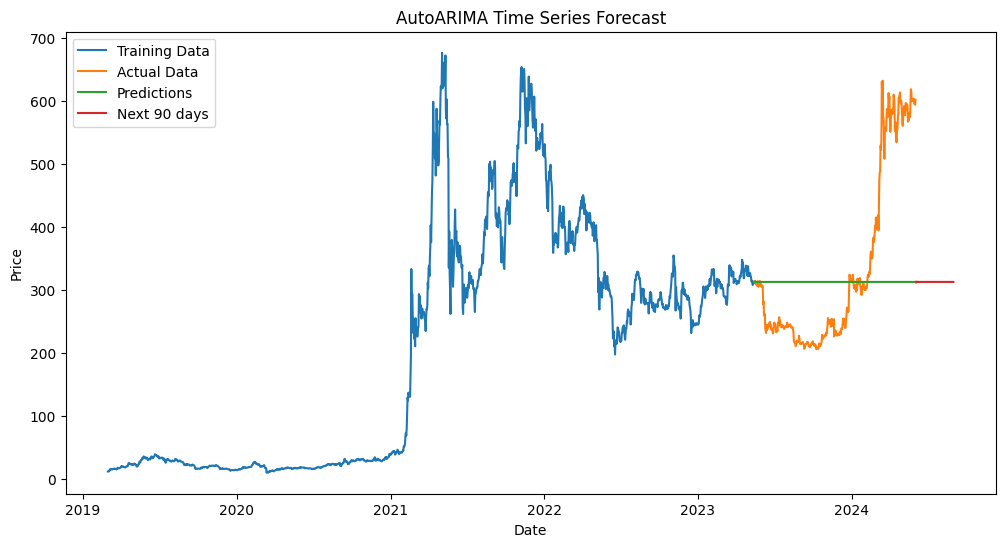

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_BNB['Date'],train_data_BNB['Price'], label='Training Data')
plt.plot(test_data_BNB['Date'], test_data_BNB['Price'], label='Actual Data')
plt.plot(test_data_BNB['Date'], predictions_BNBcoin_82, label='Predictions')
plt.plot(future_data_BNBcoin_90days_82, predictions_BNBcoin_90days_82, label='Next 90 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

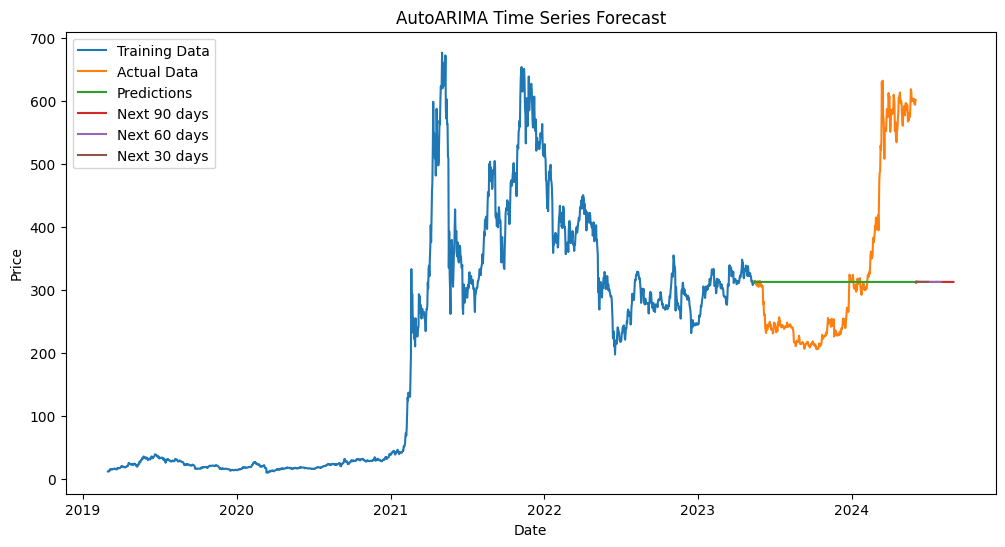

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_BNB['Date'],train_data_BNB['Price'], label='Training Data')
plt.plot(test_data_BNB['Date'], test_data_BNB['Price'], label='Actual Data')
plt.plot(test_data_BNB['Date'], predictions_BNBcoin_82, label='Predictions')
plt.plot(future_data_BNBcoin_90days_82, predictions_BNBcoin_90days_82, label='Next 90 days')
plt.plot(future_data_BNBcoin_60days_82, predictions_BNBcoin_60days_82, label='Next 60 days')
plt.plot(future_data_BNBcoin_30days_82, predictions_BNBcoin_30days_82, label='Next 30 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [14]:
rmse_82 = np.sqrt(mean_squared_error(test_data_BNB['Price'], predictions_BNBcoin_82))
mape_82 = mean_absolute_percentage_error(test_data_BNB['Price'], predictions_BNBcoin_82) * 100
mse_82 = mean_squared_error(test_data_BNB['Price'], predictions_BNBcoin_82)
print("MAPE:", mape_82)
print("RMSE:", rmse_82)
print("MSE:", mse_82)

MAPE: 30.426698414327657
RMSE: 141.7829643469446
MSE: 20102.408979006963


## Devide data 7:3

In [15]:
train_data_BNB = BNBCoin[:int(0.7*len(BNBCoin))]
test_data_BNB = BNBCoin[int(0.7*len(BNBCoin)):]
model_BNBcoin_73 = auto_arima(train_data_BNB['Price'], start_p=1, start_q=1,
                   max_p=5, max_q=5,
                   start_P=0, seasonal=False,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

model_BNBcoin_73.fit(train_data_BNB['Price'])

# Prediction data file test
predictions_BNBcoin_73 = model_BNBcoin_73.predict(n_periods=len(test_data_BNB))



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10996.467, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11026.801, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11000.181, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11004.648, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11025.152, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10993.548, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10994.044, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10994.392, Time=0.37 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10981.612, Time=0.64 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10991.153, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10981.496, Time=1.02 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=10975.165, Time=1.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=10984.911, Time=0.76 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=10974.054, Time=0.91 sec
 ARIMA(5,1,1)(0,0,0

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Prediction 30 days

In [16]:
future_dates_BNBcoin_30days_73 = pd.date_range(start=BNBCoin['Date'].max(), periods=31, freq='D')[1:]
future_data_BNBcoin_30days_73 = pd.DataFrame({'Date': future_dates_BNBcoin_30days_73})
predictions_BNBcoin_30days_73 = model_BNBcoin_73.predict(n_periods=30)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


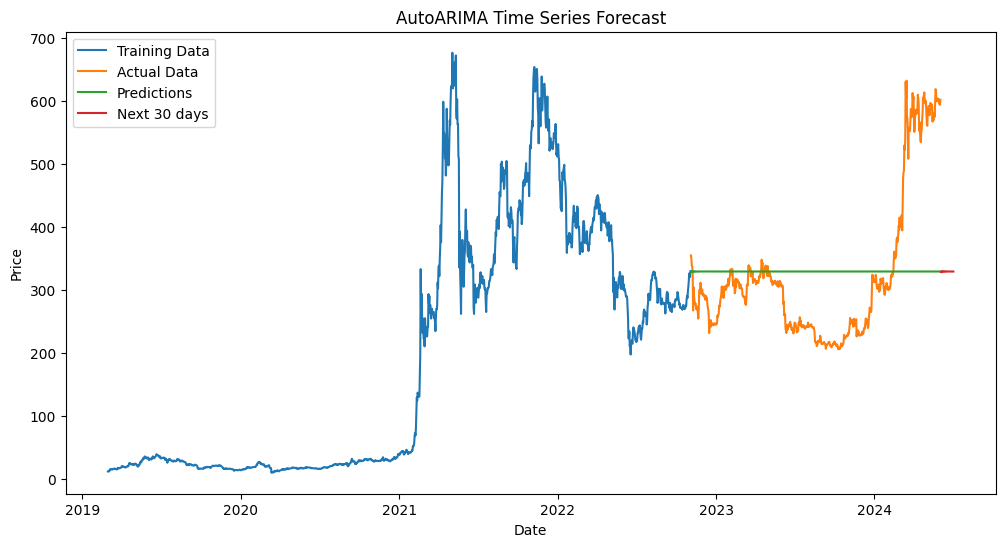

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_BNB['Date'],train_data_BNB['Price'], label='Training Data')
plt.plot(test_data_BNB['Date'], test_data_BNB['Price'], label='Actual Data')
plt.plot(test_data_BNB['Date'], predictions_BNBcoin_73, label='Predictions')
plt.plot(future_data_BNBcoin_30days_73, predictions_BNBcoin_30days_73, label='Next 30 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Prediction 60 days

In [18]:
future_dates_BNBcoin_60days_73 = pd.date_range(start=BNBCoin['Date'].max(), periods=61, freq='D')[1:]
future_data_BNBcoin_60days_73 = pd.DataFrame({'Date': future_dates_BNBcoin_60days_73})
predictions_BNBcoin_60days_73 = model_BNBcoin_73.predict(n_periods=60)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


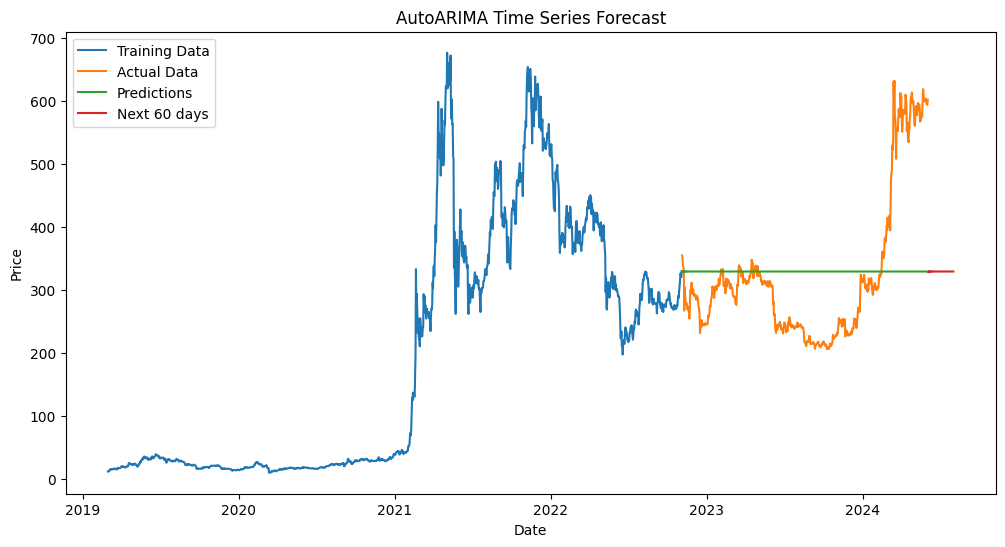

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_BNB['Date'],train_data_BNB['Price'], label='Training Data')
plt.plot(test_data_BNB['Date'], test_data_BNB['Price'], label='Actual Data')
plt.plot(test_data_BNB['Date'], predictions_BNBcoin_73, label='Predictions')
plt.plot(future_data_BNBcoin_60days_73, predictions_BNBcoin_60days_73, label='Next 60 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Prediction 90 days

In [20]:
future_dates_BNBcoin_90days_73 = pd.date_range(start=BNBCoin['Date'].max(), periods=91, freq='D')[1:]
future_data_BNBcoin_90days_73 = pd.DataFrame({'Date': future_dates_BNBcoin_90days_73})
predictions_BNBcoin_90days_73 = model_BNBcoin_73.predict(n_periods=90)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


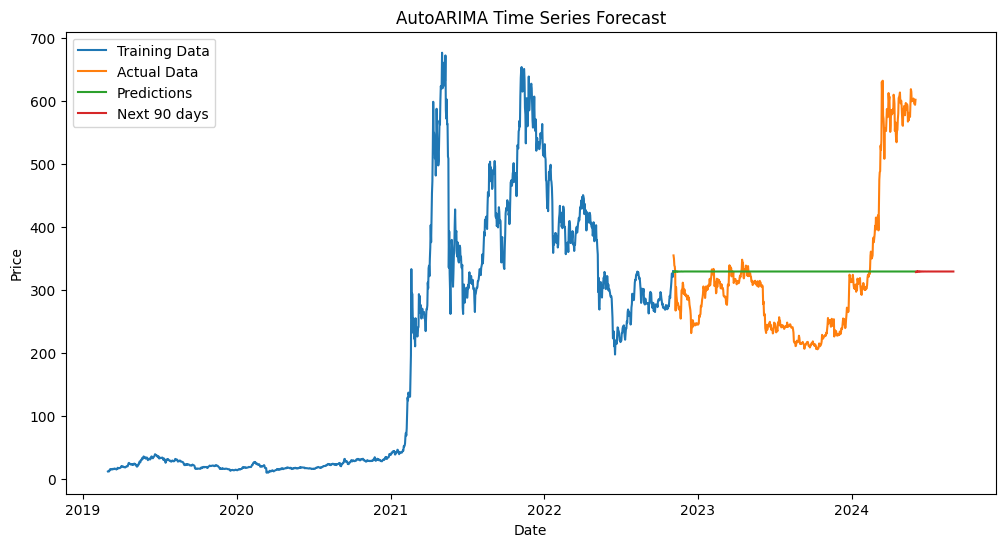

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_BNB['Date'],train_data_BNB['Price'], label='Training Data')
plt.plot(test_data_BNB['Date'], test_data_BNB['Price'], label='Actual Data')
plt.plot(test_data_BNB['Date'], predictions_BNBcoin_73, label='Predictions')
plt.plot(future_data_BNBcoin_90days_73, predictions_BNBcoin_90days_73, label='Next 90 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

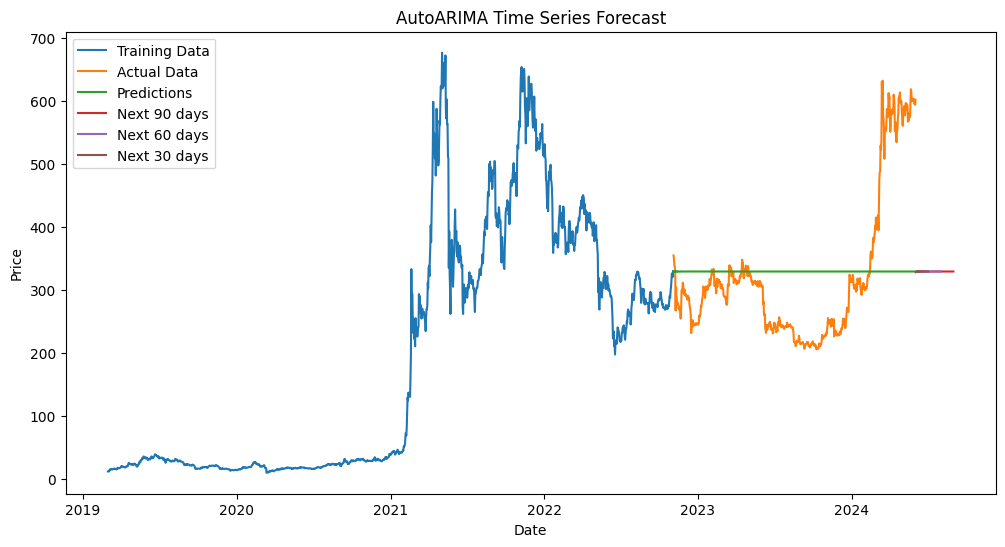

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_BNB['Date'],train_data_BNB['Price'], label='Training Data')
plt.plot(test_data_BNB['Date'], test_data_BNB['Price'], label='Actual Data')
plt.plot(test_data_BNB['Date'], predictions_BNBcoin_73, label='Predictions')
plt.plot(future_data_BNBcoin_90days_73, predictions_BNBcoin_90days_73, label='Next 90 days')
plt.plot(future_data_BNBcoin_60days_73, predictions_BNBcoin_60days_73, label='Next 60 days')
plt.plot(future_data_BNBcoin_30days_73, predictions_BNBcoin_30days_73, label='Next 30 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [24]:
rmse_73 = np.sqrt(mean_squared_error(test_data_BNB['Price'], predictions_BNBcoin_73))
mape_73 = mean_absolute_percentage_error(test_data_BNB['Price'], predictions_BNBcoin_73) * 100
mse_73 = mean_squared_error(test_data_BNB['Price'], predictions_BNBcoin_73)
print("MAPE:", mape_73)
print("RMSE:", rmse_73)
print("MSE:", mse_73)

MAPE: 26.46317893645232
RMSE: 116.78818318545709
MSE: 13639.47973175988


## Devide data 9:1

In [25]:
train_data_BNB = BNBCoin[:int(0.9*len(BNBCoin))]
test_data_BNB = BNBCoin[int(0.9*len(BNBCoin)):]
model_BNBcoin_91 = auto_arima(train_data_BNB['Price'], start_p=1, start_q=1,
                   max_p=5, max_q=5,   # m là chu kỳ mùa vụ, ở đây là mỗi năm
                   start_P=0, seasonal=False,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

model_BNBcoin_91.fit(train_data_BNB['Price'])

# Prediction data file test
predictions_BNBcoin_91 = model_BNBcoin_91.predict(n_periods=len(test_data_BNB))



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13836.598, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13875.097, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13839.877, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13845.258, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13873.259, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13831.960, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13833.668, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13832.112, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13820.714, Time=0.65 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13829.005, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13833.947, Time=0.95 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13821.028, Time=1.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13829.637, Time=0.54 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13808.637, Time=1.06 sec
 ARIMA(4,1,3)(0,0,0

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Prediction 30 days

In [26]:
future_dates_BNBcoin_30days_91 = pd.date_range(start=BNBCoin['Date'].max(), periods=31, freq='D')[1:]
future_data_BNBcoin_30days_91 = pd.DataFrame({'Date': future_dates_BNBcoin_30days_91})
predictions_BNBcoin_30days_91 = model_BNBcoin_91.predict(n_periods=30)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


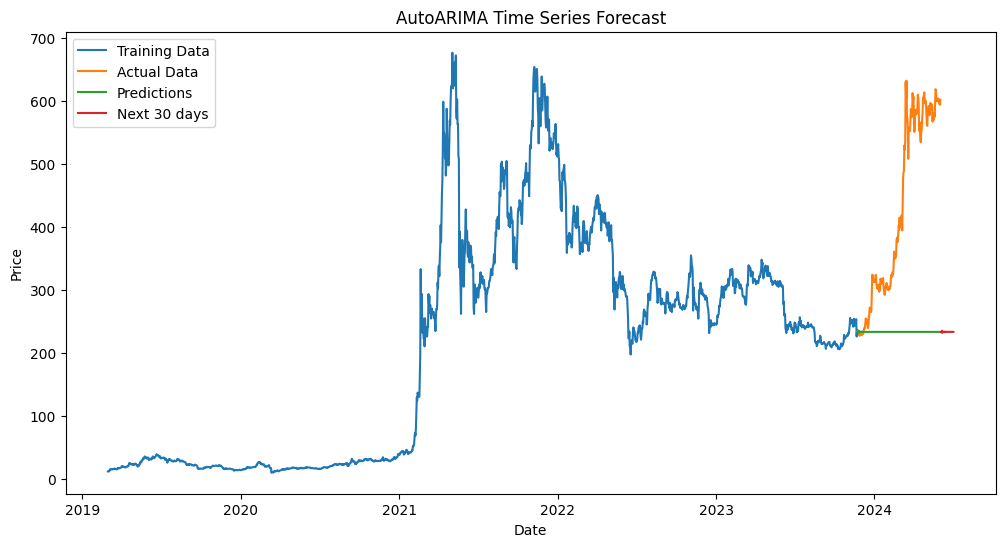

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_BNB['Date'],train_data_BNB['Price'], label='Training Data')
plt.plot(test_data_BNB['Date'], test_data_BNB['Price'], label='Actual Data')
plt.plot(test_data_BNB['Date'], predictions_BNBcoin_91, label='Predictions')
plt.plot(future_data_BNBcoin_30days_91, predictions_BNBcoin_30days_91, label='Next 30 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Prediciton 60 days

In [28]:
future_dates_BNBcoin_60days_91 = pd.date_range(start=BNBCoin['Date'].max(), periods=61, freq='D')[1:]
future_data_BNBcoin_60days_91 = pd.DataFrame({'Date': future_dates_BNBcoin_60days_91})
predictions_BNBcoin_60days_91 = model_BNBcoin_91.predict(n_periods=60)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


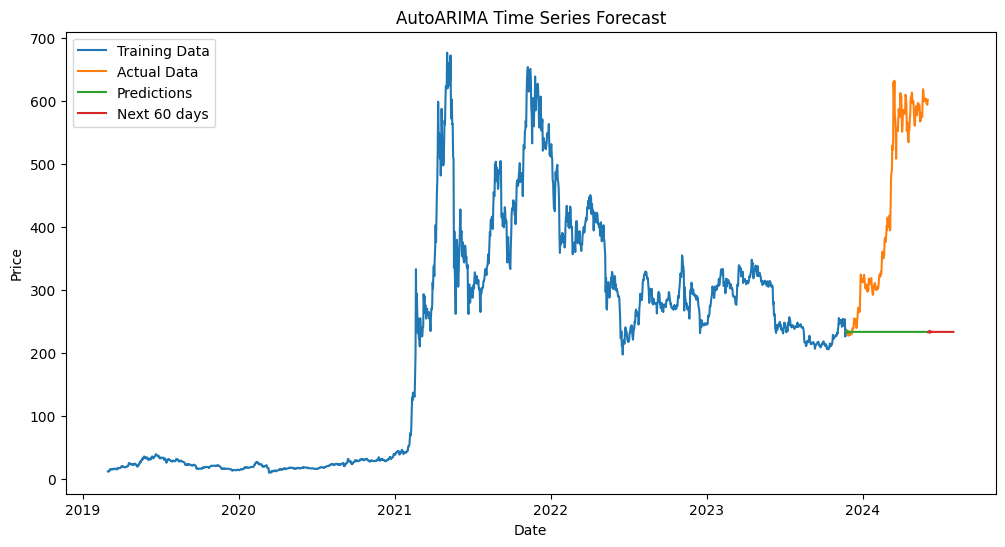

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_BNB['Date'],train_data_BNB['Price'], label='Training Data')
plt.plot(test_data_BNB['Date'], test_data_BNB['Price'], label='Actual Data')
plt.plot(test_data_BNB['Date'], predictions_BNBcoin_91, label='Predictions')
plt.plot(future_data_BNBcoin_60days_91, predictions_BNBcoin_60days_91, label='Next 60 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Prediction 90 days

In [30]:
future_dates_BNBcoin_90days_91 = pd.date_range(start=BNBCoin['Date'].max(), periods=91, freq='D')[1:]
future_data_BNBcoin_90days_91 = pd.DataFrame({'Date': future_dates_BNBcoin_90days_91})
predictions_BNBcoin_90days_91 = model_BNBcoin_91.predict(n_periods=90)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


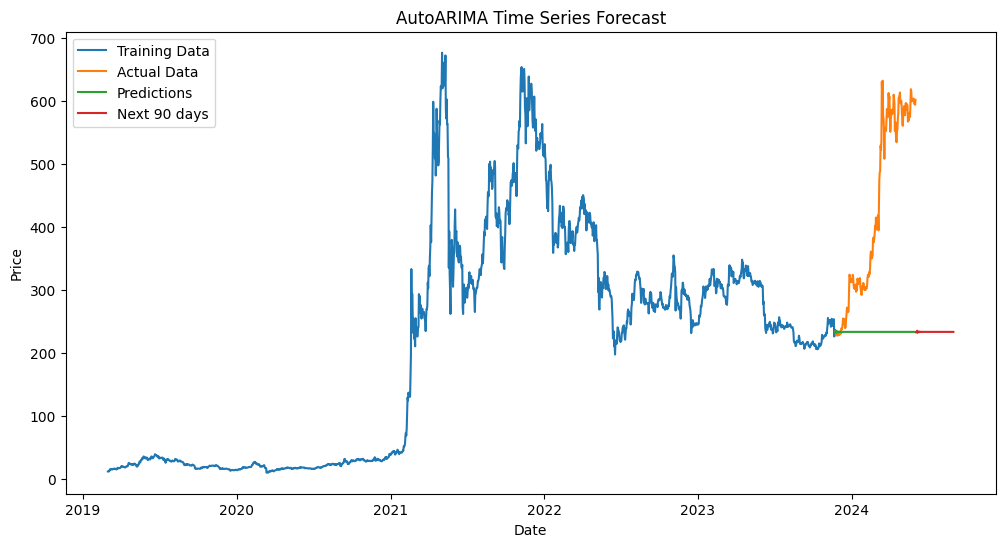

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_BNB['Date'],train_data_BNB['Price'], label='Training Data')
plt.plot(test_data_BNB['Date'], test_data_BNB['Price'], label='Actual Data')
plt.plot(test_data_BNB['Date'], predictions_BNBcoin_91, label='Predictions')
plt.plot(future_data_BNBcoin_90days_91, predictions_BNBcoin_90days_91, label='Next 90 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

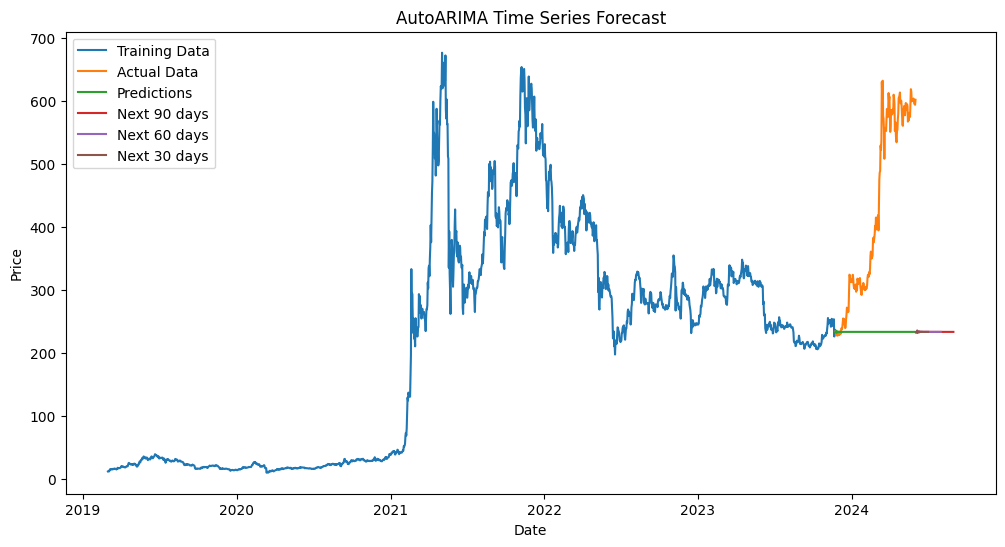

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_BNB['Date'],train_data_BNB['Price'], label='Training Data')
plt.plot(test_data_BNB['Date'], test_data_BNB['Price'], label='Actual Data')
plt.plot(test_data_BNB['Date'], predictions_BNBcoin_91, label='Predictions')
plt.plot(future_data_BNBcoin_90days_91, predictions_BNBcoin_90days_91, label='Next 90 days')
plt.plot(future_data_BNBcoin_60days_91, predictions_BNBcoin_60days_91, label='Next 60 days')
plt.plot(future_data_BNBcoin_30days_91, predictions_BNBcoin_30days_91, label='Next 30 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [33]:
rmse_91 = np.sqrt(mean_squared_error(test_data_BNB['Price'], predictions_BNBcoin_91))
mape_91 = mean_absolute_percentage_error(test_data_BNB['Price'], predictions_BNBcoin_91) * 100
mse_91 = mean_squared_error(test_data_BNB['Price'], predictions_BNBcoin_91)
print("MAPE:", mape_91)
print("RMSE:", rmse_91)
print("MSE:", mse_91)

MAPE: 38.72268915288715
RMSE: 242.38567084994406
MSE: 58750.81343337742


# DOGECOIN

In [34]:
file_path = "D:/Dữ liệu kinh doanh/DoAn/ptdl/IS403_O22_HTCL_12/Dataset/Dogecoin Historical Data.csv"
DOGECoin = pd.read_csv(file_path)

In [35]:
DOGECoin

,Date,Price,Open,High,Low,Vol.,Change %
0,06/01/2024,0.159439,0.158970,0.159791,0.158429,1.37B,0.28%
1,05/31/2024,0.158988,0.159467,0.162414,0.154371,1.42B,-0.31%
2,05/30/2024,0.159481,0.163834,0.165635,0.156622,2.22B,-2.66%
3,05/29/2024,0.163836,0.164934,0.170558,0.162226,2.18B,-0.67%
4,05/28/2024,0.164947,0.169086,0.169675,0.161851,1.98B,-2.44%
...,...,...,...,...,...,...,...
1915,03/05/2019,0.001947,0.001908,0.001968,0.001901,514.18M,2.04%
1916,03/04/2019,0.001908,0.001959,0.001973,0.001903,204.78M,-2.60%
1917,03/03/2019,0.001959,0.001979,0.002000,0.001956,247.18M,-1.01%
1918,03/02/2019,0.001979,0.001964,0.001984,0.001952,467.24M,0.79%


In [36]:
DOGECoin['Date'] = pd.to_datetime(DOGECoin['Date'])
DOGECoin.sort_values('Date', inplace=True)

## Devide data 8:2

In [37]:
train_data_Doge = DOGECoin[:int(0.8*len(DOGECoin))]
test_data_Doge = DOGECoin[int(0.8*len(DOGECoin)):]
model_DOGEcoin_82 = auto_arima(train_data_Doge['Price'], start_p=1, start_q=1,
                   max_p=5, max_q=5,   # m là chu kỳ mùa vụ, ở đây là mỗi năm
                   start_P=0, seasonal=False,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

model_DOGEcoin_82.fit(train_data_Doge['Price'])

# Prediction data file test
predictions_DOGECoin_82 = model_DOGEcoin_82.predict(n_periods=len(test_data_Doge))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8694.109, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8650.459, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8695.260, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8689.710, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8652.443, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-8694.912, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-8696.209, Time=0.62 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-8703.527, Time=0.65 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-8704.654, Time=0.76 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-8708.395, Time=0.31 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-8773.974, Time=0.29 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-8782.924, Time=1.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-8703.820, Time=0.75 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-8780.848, Time=1.20 sec
 ARIMA(4,1,2)(0,0,0

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [38]:
future_dates_DOGEcoin_30days_82 = pd.date_range(start=DOGECoin['Date'].max(), periods=31, freq='D')[1:]
future_data_DOGEcoin_30days_82 = pd.DataFrame({'Date': future_dates_DOGEcoin_30days_82})
predictions_DOGEcoin_30days_82 = model_DOGEcoin_82.predict(n_periods=30)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


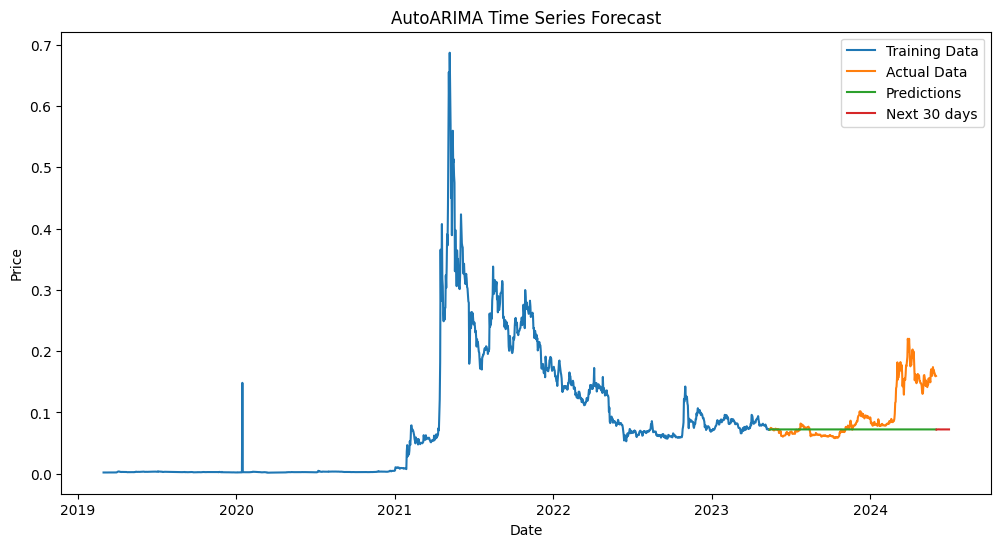

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_Doge['Date'],train_data_Doge['Price'], label='Training Data')
plt.plot(test_data_Doge['Date'], test_data_Doge['Price'], label='Actual Data')
plt.plot(test_data_Doge['Date'], predictions_DOGECoin_82, label='Predictions')
plt.plot(future_data_DOGEcoin_30days_82, predictions_DOGEcoin_30days_82, label='Next 30 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Prediction 60 days

In [40]:
future_dates_DOGEcoin_60days_82 = pd.date_range(start=DOGECoin['Date'].max(), periods=61, freq='D')[1:]
future_data_DOGEcoin_60days_82 = pd.DataFrame({'Date': future_dates_DOGEcoin_60days_82})
predictions_DOGEcoin_60days_82 = model_DOGEcoin_82.predict(n_periods=60)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


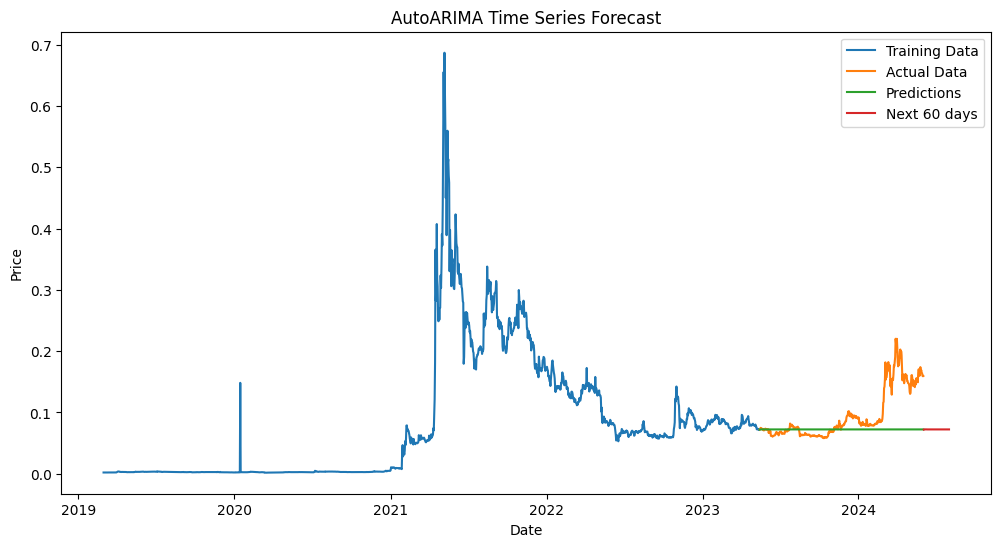

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_Doge['Date'],train_data_Doge['Price'], label='Training Data')
plt.plot(test_data_Doge['Date'], test_data_Doge['Price'], label='Actual Data')
plt.plot(test_data_Doge['Date'], predictions_DOGECoin_82, label='Predictions')
plt.plot(future_data_DOGEcoin_60days_82, predictions_DOGEcoin_60days_82, label='Next 60 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Prediction 90 days

In [42]:
future_dates_DOGEcoin_90days_82 = pd.date_range(start=DOGECoin['Date'].max(), periods=91, freq='D')[1:]
future_data_DOGEcoin_90days_82 = pd.DataFrame({'Date': future_dates_DOGEcoin_90days_82})
predictions_DOGEcoin_90days_82 = model_DOGEcoin_82.predict(n_periods=90)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


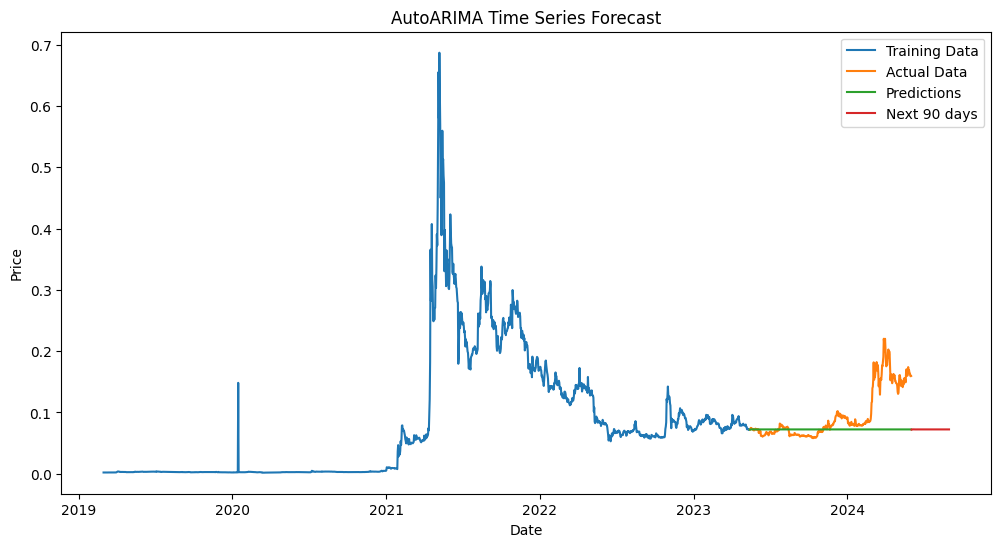

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_Doge['Date'],train_data_Doge['Price'], label='Training Data')
plt.plot(test_data_Doge['Date'], test_data_Doge['Price'], label='Actual Data')
plt.plot(test_data_Doge['Date'], predictions_DOGECoin_82, label='Predictions')
plt.plot(future_data_DOGEcoin_90days_82, predictions_DOGEcoin_90days_82, label='Next 90 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

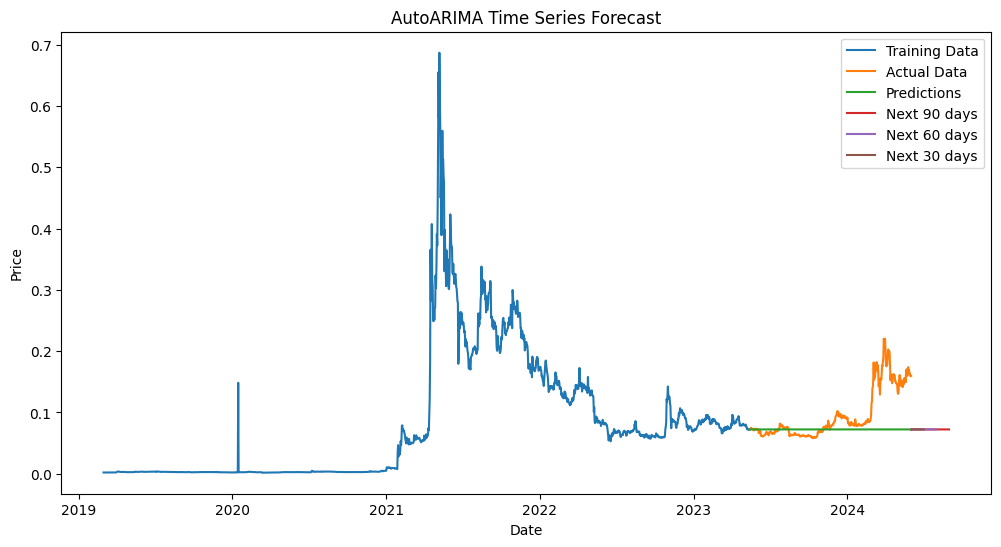

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_Doge['Date'],train_data_Doge['Price'], label='Training Data')
plt.plot(test_data_Doge['Date'], test_data_Doge['Price'], label='Actual Data')
plt.plot(test_data_Doge['Date'], predictions_DOGECoin_82, label='Predictions')
plt.plot(future_data_DOGEcoin_90days_82, predictions_DOGEcoin_90days_82, label='Next 90 days')
plt.plot(future_data_DOGEcoin_60days_82, predictions_DOGEcoin_60days_82, label='Next 60 days')
plt.plot(future_data_DOGEcoin_30days_82, predictions_DOGEcoin_30days_82, label='Next 30 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [46]:
rmse_82 = np.sqrt(mean_squared_error(test_data_Doge['Price'], predictions_DOGECoin_82))
mape_82 = mean_absolute_percentage_error(test_data_Doge['Price'], predictions_DOGECoin_82) * 100
mse_82 = mean_squared_error(test_data_Doge['Price'], predictions_DOGECoin_82)
print("MAPE:", mape_82)
print("RMSE:", rmse_82)
print("MSE:", mse_82)


MAPE: 22.36626913073886
RMSE: 0.04689834060780827
MSE: 0.0021994543517659983


## Devide data 7:3

In [47]:
train_data_Doge = DOGECoin[:int(0.7*len(DOGECoin))]
test_data_Doge = DOGECoin[int(0.7*len(DOGECoin)):]
model_DOGEcoin_73 = auto_arima(train_data_Doge['Price'], start_p=1, start_q=1,
                   max_p=5, max_q=5,   # m là chu kỳ mùa vụ, ở đây là mỗi năm
                   start_P=0, seasonal=False,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

model_DOGEcoin_73.fit(train_data_Doge['Price'])

# Prediction data file test
predictions_DOGECoin_73 = model_DOGEcoin_73.predict(n_periods=len(test_data_Doge))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7439.594, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7401.236, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7440.871, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7436.422, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7403.190, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-7440.273, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-7439.014, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-7442.805, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-7442.212, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-7441.531, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-7437.875, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-7443.070, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-7449.300, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-7450.510, Time=0.11 sec
 ARIMA(4,1,0)(0,0,0

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Prediction 30 days

In [48]:
future_dates_DOGEcoin_30days_73 = pd.date_range(start=DOGECoin['Date'].max(), periods=31, freq='D')[1:]
future_data_DOGEcoin_30days_73 = pd.DataFrame({'Date': future_dates_DOGEcoin_30days_73})
predictions_DOGEcoin_30days_73 = model_DOGEcoin_73.predict(n_periods=30)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


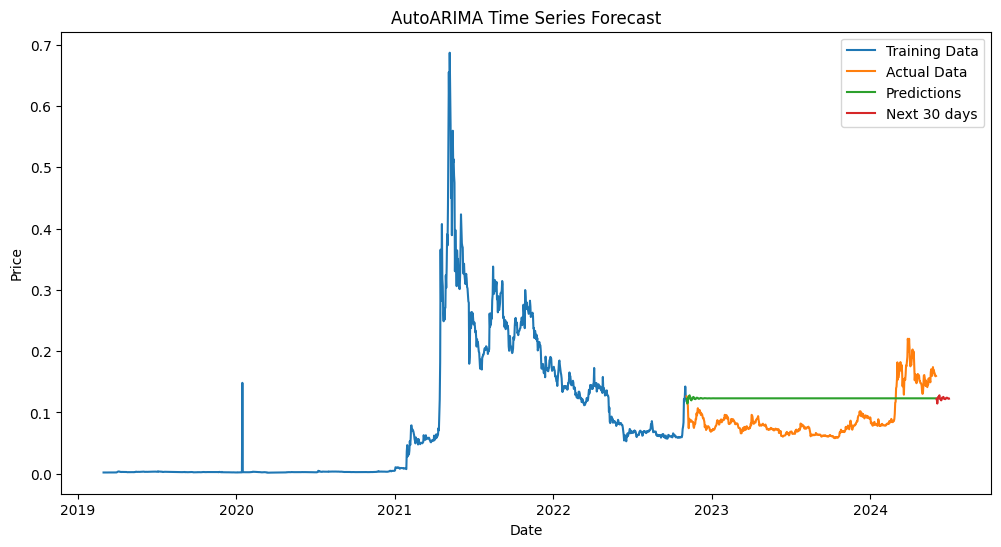

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_Doge['Date'],train_data_Doge['Price'], label='Training Data')
plt.plot(test_data_Doge['Date'], test_data_Doge['Price'], label='Actual Data')
plt.plot(test_data_Doge['Date'], predictions_DOGECoin_73, label='Predictions')
plt.plot(future_data_DOGEcoin_30days_73, predictions_DOGEcoin_30days_73, label='Next 30 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Prediction 60 days

In [50]:
future_dates_DOGEcoin_60days_73 = pd.date_range(start=DOGECoin['Date'].max(), periods=61, freq='D')[1:]
future_data_DOGEcoin_60days_73 = pd.DataFrame({'Date': future_dates_DOGEcoin_60days_73})
predictions_DOGEcoin_60days_73 = model_DOGEcoin_73.predict(n_periods=60)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


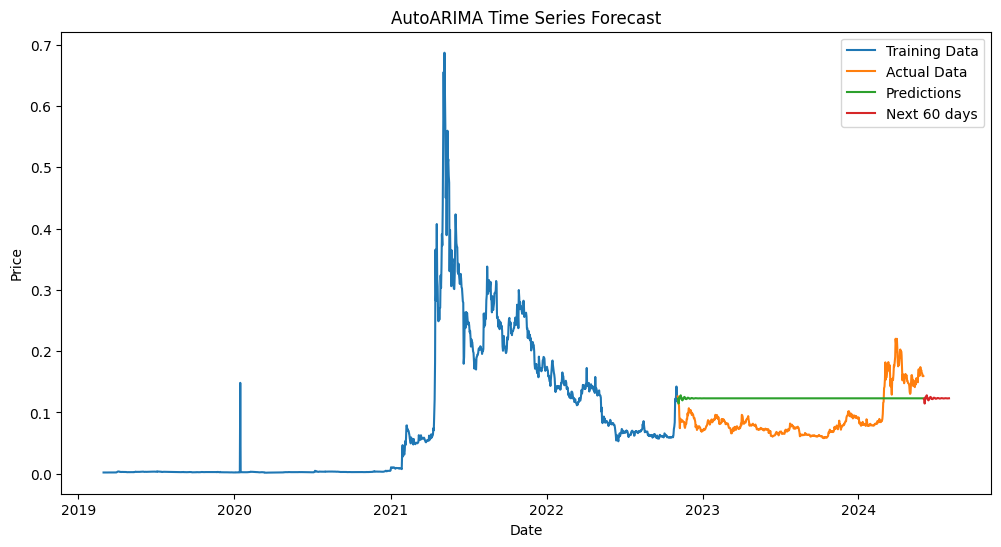

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_Doge['Date'],train_data_Doge['Price'], label='Training Data')
plt.plot(test_data_Doge['Date'], test_data_Doge['Price'], label='Actual Data')
plt.plot(test_data_Doge['Date'], predictions_DOGECoin_73, label='Predictions')
plt.plot(future_data_DOGEcoin_60days_73, predictions_DOGEcoin_60days_73, label='Next 60 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Prediction 90 days

In [52]:
future_dates_DOGEcoin_90days_73 = pd.date_range(start=DOGECoin['Date'].max(), periods=91, freq='D')[1:]
future_data_DOGEcoin_90days_73 = pd.DataFrame({'Date': future_dates_DOGEcoin_90days_73})
predictions_DOGEcoin_90days_73 = model_DOGEcoin_73.predict(n_periods=90)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


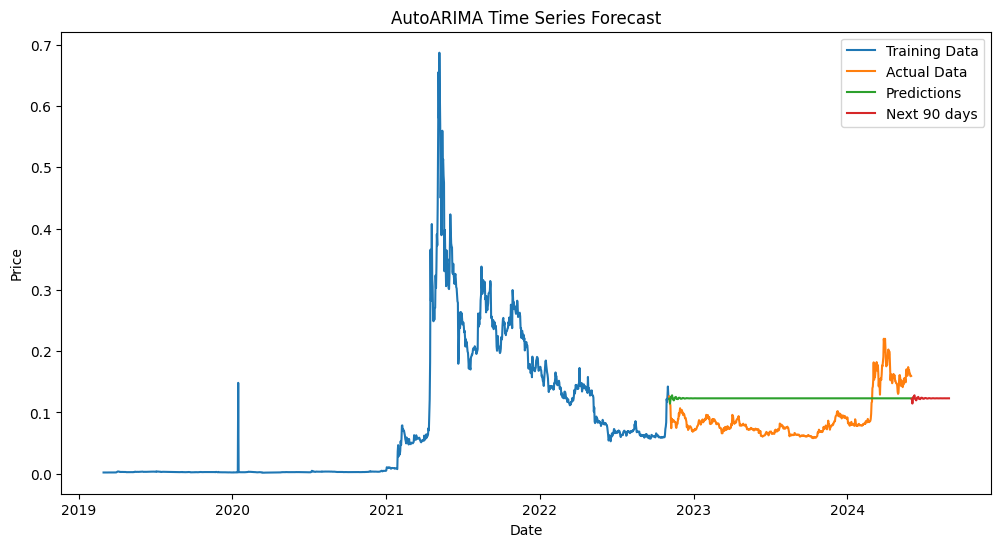

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_Doge['Date'],train_data_Doge['Price'], label='Training Data')
plt.plot(test_data_Doge['Date'], test_data_Doge['Price'], label='Actual Data')
plt.plot(test_data_Doge['Date'], predictions_DOGECoin_73, label='Predictions')
plt.plot(future_data_DOGEcoin_90days_73, predictions_DOGEcoin_90days_73, label='Next 90 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

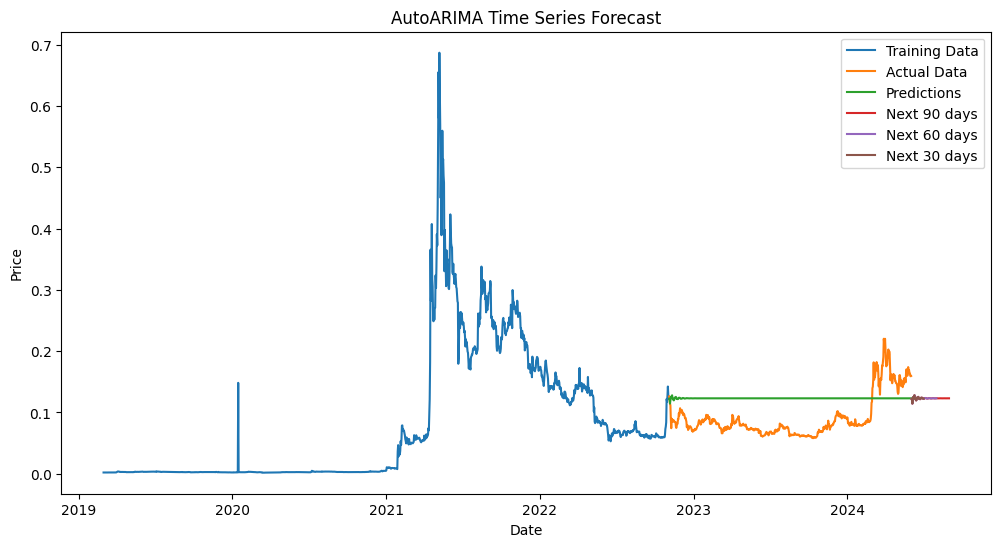

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_Doge['Date'],train_data_Doge['Price'], label='Training Data')
plt.plot(test_data_Doge['Date'], test_data_Doge['Price'], label='Actual Data')
plt.plot(test_data_Doge['Date'], predictions_DOGECoin_73, label='Predictions')
plt.plot(future_data_DOGEcoin_90days_73, predictions_DOGEcoin_90days_73, label='Next 90 days')
plt.plot(future_data_DOGEcoin_60days_73, predictions_DOGEcoin_60days_73, label='Next 60 days')
plt.plot(future_data_DOGEcoin_30days_73, predictions_DOGEcoin_30days_73, label='Next 30 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [56]:
rmse_73 = np.sqrt(mean_squared_error(test_data_Doge['Price'], predictions_DOGECoin_73))
mape_73 = mean_absolute_percentage_error(test_data_Doge['Price'], predictions_DOGECoin_73) * 100
mse_73 = mean_squared_error(test_data_Doge['Price'], predictions_DOGECoin_73)
print("MAPE:", mape_73)
print("RMSE:", rmse_73)
print("MSE:", mse_73)

MAPE: 55.77431990412648
RMSE: 0.0465289985057836
MSE: 0.002164947701951212


## Devide data 9:1

In [57]:
train_data_Doge = DOGECoin[:int(0.9*len(DOGECoin))]
test_data_Doge = DOGECoin[int(0.9*len(DOGECoin)):]
model_DOGEcoin_91 = auto_arima(train_data_Doge['Price'], start_p=1, start_q=1,
                   max_p=5, max_q=5,   # m là chu kỳ mùa vụ, ở đây là mỗi năm
                   start_P=0, seasonal=False,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

model_DOGEcoin_91.fit(train_data_Doge['Price'])

# Prediction data file test
predictions_DOGECoin_91 = model_DOGEcoin_91.predict(n_periods=len(test_data_Doge))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9981.592, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9932.023, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9982.632, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9976.404, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9934.005, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9982.494, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9981.444, Time=0.84 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-9984.609, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-9984.472, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-9983.570, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-9978.379, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-9983.422, Time=0.45 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 2.857 seconds


c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Prediction 30 days

In [58]:
future_dates_DOGEcoin_30days_91 = pd.date_range(start=DOGECoin['Date'].max(), periods=31, freq='D')[1:]
future_data_DOGEcoin_30days_91 = pd.DataFrame({'Date': future_dates_DOGEcoin_30days_91})
predictions_DOGEcoin_30days_91 = model_DOGEcoin_91.predict(n_periods=30)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


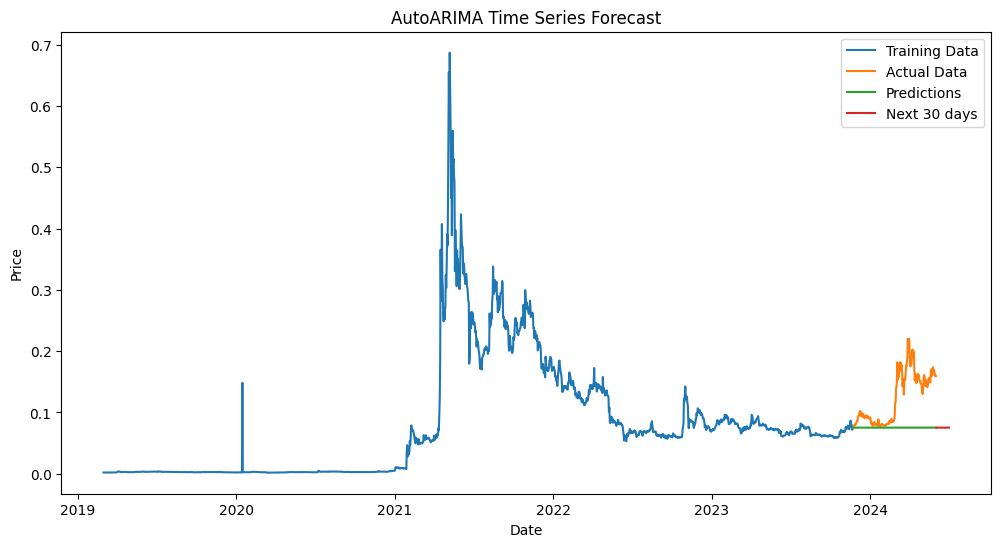

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_Doge['Date'],train_data_Doge['Price'], label='Training Data')
plt.plot(test_data_Doge['Date'], test_data_Doge['Price'], label='Actual Data')
plt.plot(test_data_Doge['Date'], predictions_DOGECoin_91, label='Predictions')
plt.plot(future_data_DOGEcoin_30days_91, predictions_DOGEcoin_30days_91, label='Next 30 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Prediction 60 days

In [60]:
future_dates_DOGEcoin_60days_91 = pd.date_range(start=DOGECoin['Date'].max(), periods=61, freq='D')[1:]
future_data_DOGEcoin_60days_91 = pd.DataFrame({'Date': future_dates_DOGEcoin_60days_91})
predictions_DOGEcoin_60days_91 = model_DOGEcoin_91.predict(n_periods=60)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


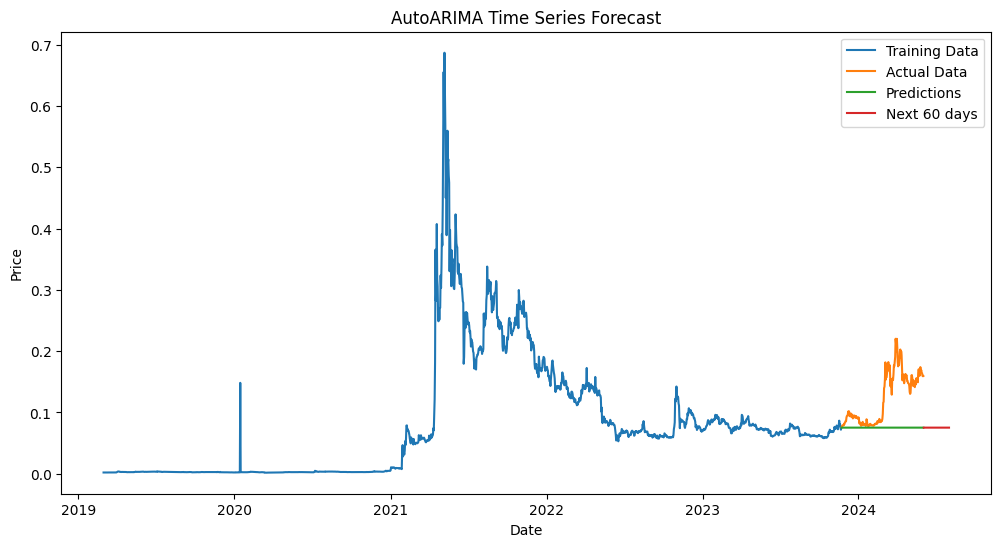

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_Doge['Date'],train_data_Doge['Price'], label='Training Data')
plt.plot(test_data_Doge['Date'], test_data_Doge['Price'], label='Actual Data')
plt.plot(test_data_Doge['Date'], predictions_DOGECoin_91, label='Predictions')
plt.plot(future_data_DOGEcoin_60days_91, predictions_DOGEcoin_60days_91, label='Next 60 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Prediction 90 days

In [62]:
future_dates_DOGEcoin_90days_91 = pd.date_range(start=DOGECoin['Date'].max(), periods=91, freq='D')[1:]
future_data_DOGEcoin_90days_91 = pd.DataFrame({'Date': future_dates_DOGEcoin_90days_91})
predictions_DOGEcoin_90days_91 = model_DOGEcoin_91.predict(n_periods=90)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


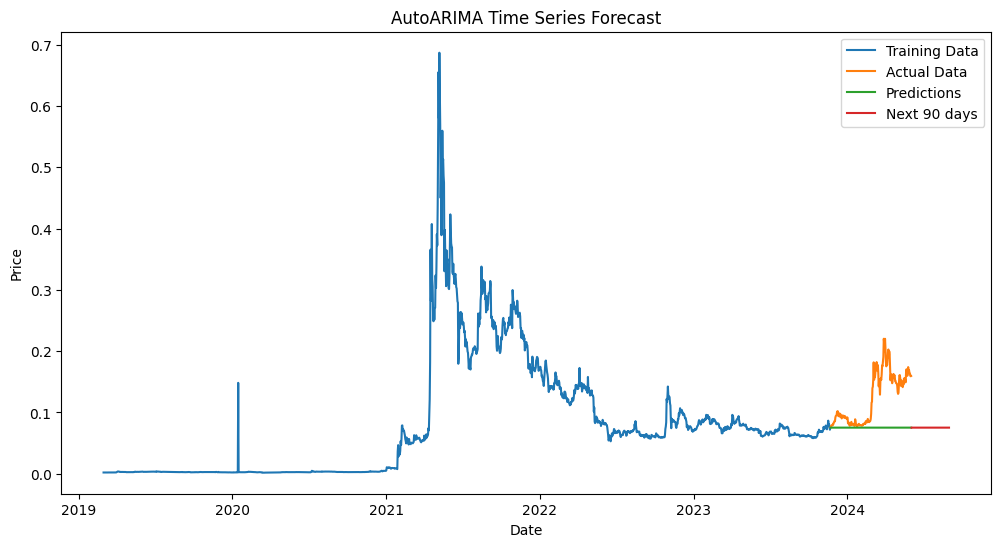

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_Doge['Date'],train_data_Doge['Price'], label='Training Data')
plt.plot(test_data_Doge['Date'], test_data_Doge['Price'], label='Actual Data')
plt.plot(test_data_Doge['Date'], predictions_DOGECoin_91, label='Predictions')
plt.plot(future_data_DOGEcoin_90days_91, predictions_DOGEcoin_90days_91, label='Next 90 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

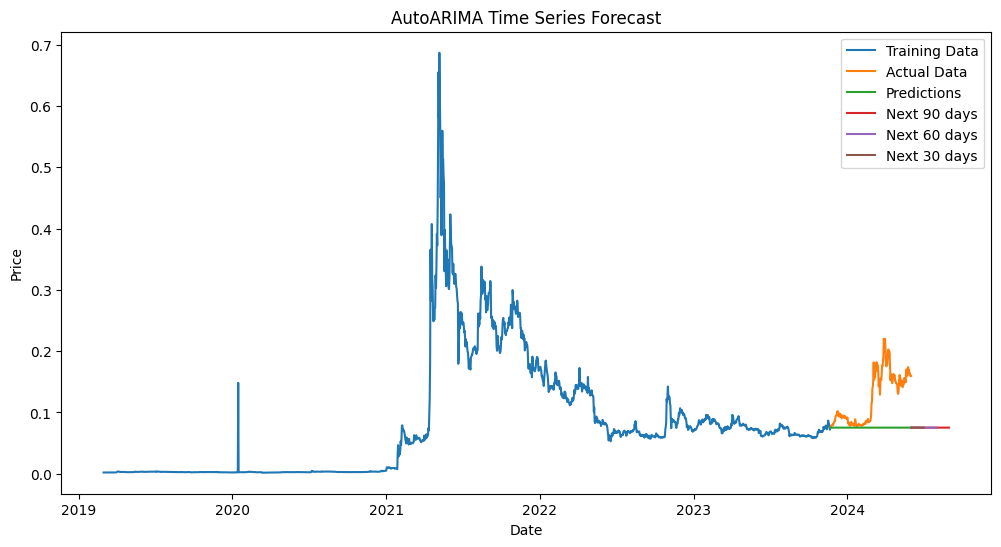

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_Doge['Date'],train_data_Doge['Price'], label='Training Data')
plt.plot(test_data_Doge['Date'], test_data_Doge['Price'], label='Actual Data')
plt.plot(test_data_Doge['Date'], predictions_DOGECoin_91, label='Predictions')
plt.plot(future_data_DOGEcoin_90days_91, predictions_DOGEcoin_90days_91, label='Next 90 days')
plt.plot(future_data_DOGEcoin_60days_91, predictions_DOGEcoin_60days_91, label='Next 60 days')
plt.plot(future_data_DOGEcoin_30days_91, predictions_DOGEcoin_30days_91, label='Next 30 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [67]:
rmse_91 = np.sqrt(mean_squared_error(test_data_Doge['Price'], predictions_DOGECoin_91))
mape_91 = mean_absolute_percentage_error(test_data_Doge['Price'], predictions_DOGECoin_91) * 100
mse_91 = mean_squared_error(test_data_Doge['Price'], predictions_DOGECoin_91)
print("MAPE:", mape_91)
print("RMSE:", rmse_91)
print("MSE:", mse_91)

MAPE: 32.17871321672677
RMSE: 0.06364273062305967
MSE: 0.0040503971611593375



# TRON COIN

In [68]:
file_path = "D:/Dữ liệu kinh doanh/DoAn/ptdl/IS403_O22_HTCL_12/Dataset/TRON Historical Data.csv"
TRONcoin = pd.read_csv(file_path)

In [69]:
TRONcoin

,Date,Price,Open,High,Low,Vol.,Change %
0,06/01/2024,0.112613,0.112847,0.112874,0.112528,214.06M,0.30%
1,05/31/2024,0.112272,0.111990,0.112578,0.110974,315.08M,0.25%
2,05/30/2024,0.111990,0.112102,0.112250,0.110778,289.53M,-0.11%
3,05/29/2024,0.112110,0.111181,0.112447,0.110965,318.37M,0.84%
4,05/28/2024,0.111181,0.112557,0.112584,0.110374,393.10M,-1.22%
...,...,...,...,...,...,...,...
1915,03/05/2019,0.023728,0.022736,0.023900,0.022029,4.12B,4.36%
1916,03/04/2019,0.022736,0.022475,0.023007,0.020613,4.12B,1.16%
1917,03/03/2019,0.022475,0.022658,0.022975,0.022340,1.73B,-0.81%
1918,03/02/2019,0.022658,0.023497,0.023576,0.022242,4.38B,-3.56%


In [70]:
TRONcoin['Date'] = pd.to_datetime(TRONcoin['Date'])
TRONcoin.sort_values('Date', inplace=True)

## Devide data 8:2

In [71]:
train_data_tron = TRONcoin[:int(0.8*len(TRONcoin))]
test_data_tron = TRONcoin[int(0.8*len(TRONcoin)):]
model_TRONcoin_82 = auto_arima(train_data_tron['Price'], start_p=1, start_q=1,
                   max_p=5, max_q=5,   # m là chu kỳ mùa vụ, ở đây là mỗi năm
                   start_P=0, seasonal=False,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

model_TRONcoin_82.fit(train_data_tron['Price'])

# Prediction data file test
predictions_TRONcoin_82 = model_TRONcoin_82.predict(n_periods=len(test_data_tron))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-13243.589, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-13207.914, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13236.864, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13232.391, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-13209.786, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-13240.968, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-13241.279, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-13241.897, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-13242.954, Time=0.40 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-13238.515, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-13245.443, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-13234.224, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-13238.693, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-13242.815, Time=0.16 sec
 ARIM

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Prediction 30 days

In [72]:
future_dates_TRONcoin_30days_82 = pd.date_range(start=TRONcoin['Date'].max(), periods=31, freq='D')[1:]
future_data_TRONcoin_30days_82 = pd.DataFrame({'Date': future_dates_TRONcoin_30days_82})
predictions_TRONcoin_30days_82 = model_TRONcoin_82.predict(n_periods=30)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


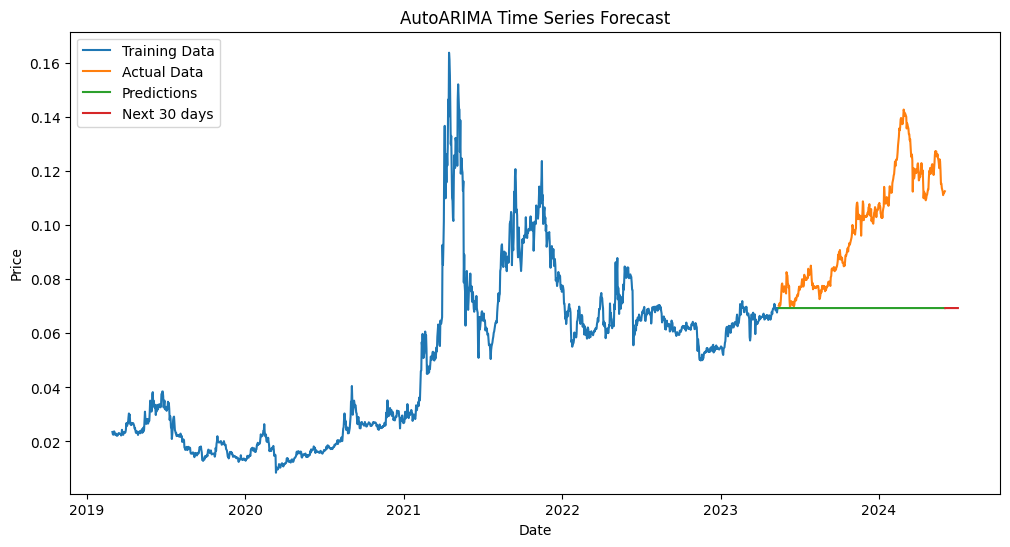

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_tron['Date'],train_data_tron['Price'], label='Training Data')
plt.plot(test_data_tron['Date'], test_data_tron['Price'], label='Actual Data')
plt.plot(test_data_tron['Date'], predictions_TRONcoin_82, label='Predictions')
plt.plot(future_data_TRONcoin_30days_82, predictions_TRONcoin_30days_82, label='Next 30 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Prediction 60 days

In [74]:
future_dates_TRONcoin_60days_82 = pd.date_range(start=TRONcoin['Date'].max(), periods=61, freq='D')[1:]
future_data_TRONcoin_60days_82 = pd.DataFrame({'Date': future_dates_TRONcoin_60days_82})
predictions_TRONcoin_60days_82 = model_TRONcoin_82.predict(n_periods=60)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


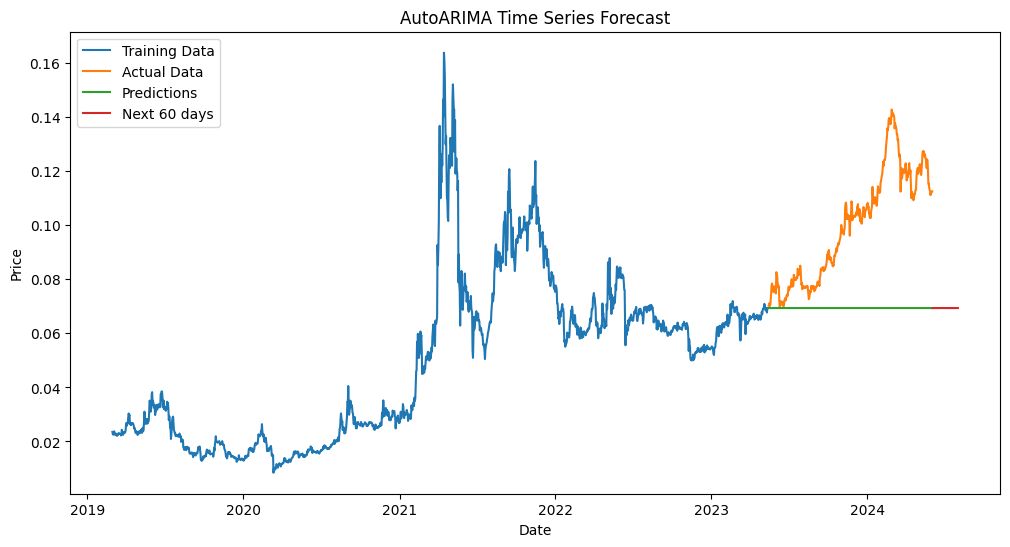

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_tron['Date'],train_data_tron['Price'], label='Training Data')
plt.plot(test_data_tron['Date'], test_data_tron['Price'], label='Actual Data')
plt.plot(test_data_tron['Date'], predictions_TRONcoin_82, label='Predictions')
plt.plot(future_data_TRONcoin_60days_82,predictions_TRONcoin_60days_82 , label='Next 60 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Prediction 90 days

In [76]:
future_dates_TRONcoin_90days_82 = pd.date_range(start=TRONcoin['Date'].max(), periods=91, freq='D')[1:]
future_data_TRONcoin_90days_82 = pd.DataFrame({'Date': future_dates_TRONcoin_90days_82})
predictions_TRONcoin_90days_82 = model_TRONcoin_82.predict(n_periods=90)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


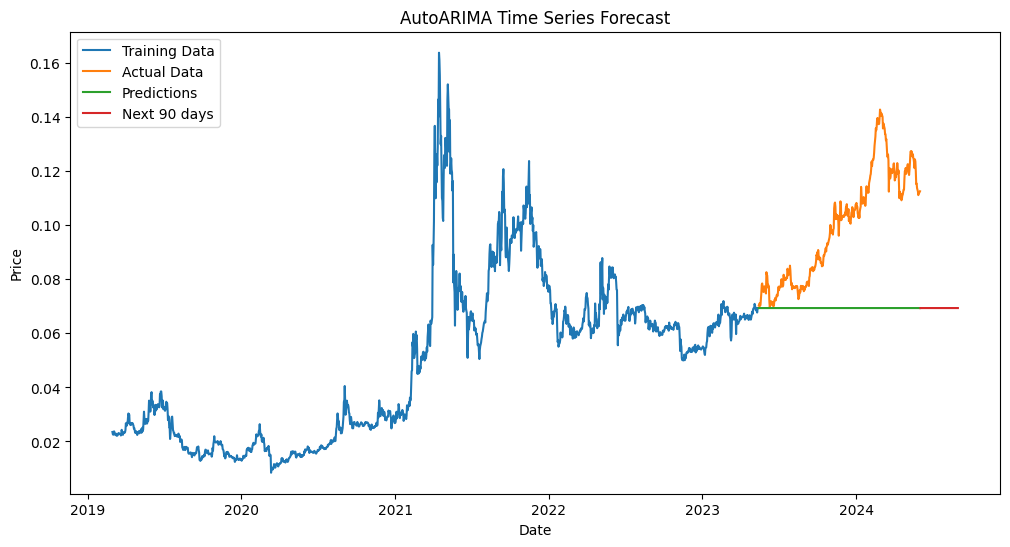

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_tron['Date'],train_data_tron['Price'], label='Training Data')
plt.plot(test_data_tron['Date'], test_data_tron['Price'], label='Actual Data')
plt.plot(test_data_tron['Date'], predictions_TRONcoin_82, label='Predictions')
plt.plot(future_data_TRONcoin_90days_82,predictions_TRONcoin_90days_82 , label='Next 90 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

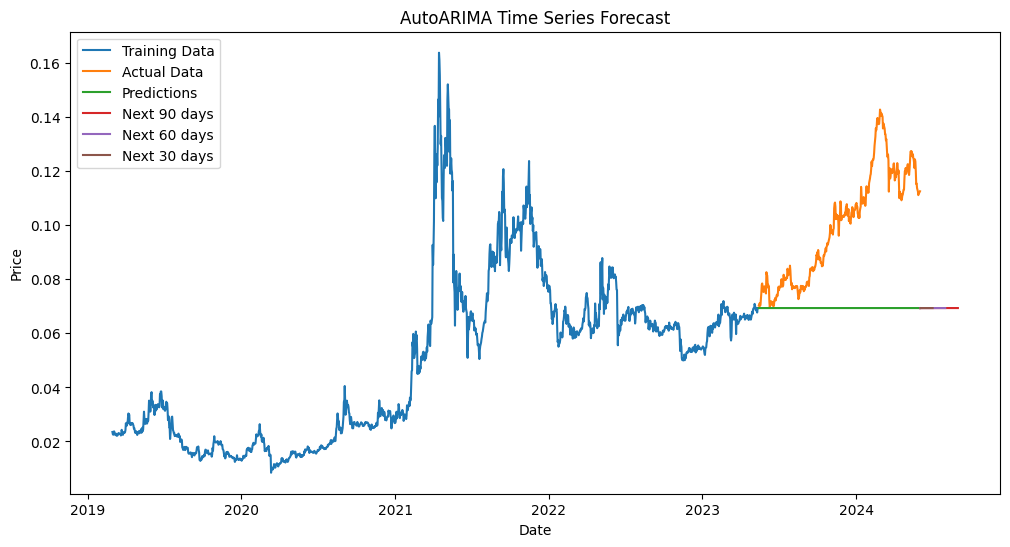

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_tron['Date'],train_data_tron['Price'], label='Training Data')
plt.plot(test_data_tron['Date'], test_data_tron['Price'], label='Actual Data')
plt.plot(test_data_tron['Date'], predictions_TRONcoin_82, label='Predictions')
plt.plot(future_data_TRONcoin_90days_82, predictions_TRONcoin_90days_82, label='Next 90 days')
plt.plot(future_data_TRONcoin_60days_82, predictions_TRONcoin_60days_82, label='Next 60 days')
plt.plot(future_data_TRONcoin_30days_82, predictions_TRONcoin_30days_82, label='Next 30 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [80]:
rmse_82 = np.sqrt(mean_squared_error(test_data_tron['Price'], predictions_TRONcoin_82))
mape_82 = mean_absolute_percentage_error(test_data_tron['Price'], predictions_TRONcoin_82) * 100
mse_82 = mean_squared_error(test_data_tron['Price'], predictions_TRONcoin_82)
print("MAPE:", mape_82)
print("RMSE:", rmse_82)
print("MSE:", mse_82)


MAPE: 27.54690967460574
RMSE: 0.03650336344394506
MSE: 0.0013324955427207446


## Devide data 7:3

In [81]:
train_data_tron = TRONcoin[:int(0.7*len(TRONcoin))]
test_data_tron = TRONcoin[int(0.7*len(TRONcoin)):]
model_TRONcoin_73 = auto_arima(train_data_tron['Price'], start_p=1, start_q=1,
                   max_p=5, max_q=5,   # m là chu kỳ mùa vụ, ở đây là mỗi năm
                   start_P=0, seasonal=False,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

model_TRONcoin_73.fit(train_data_tron['Price'])

# Prediction data file test
predictions_TRONcoin_73 = model_TRONcoin_73.predict(n_periods=len(test_data_tron))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11448.585, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11418.337, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11442.870, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11438.943, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11420.244, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-11446.299, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-11446.186, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-11447.505, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-11448.293, Time=0.38 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11443.404, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-11450.480, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-11440.823, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-11444.748, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-11448.196, Time=0.12 sec
 ARIM

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Prediction 30 days

In [82]:
future_dates_TRONcoin_30days_73 = pd.date_range(start=TRONcoin['Date'].max(), periods=31, freq='D')[1:]
future_data_TRONcoin_30days_73 = pd.DataFrame({'Date': future_dates_TRONcoin_30days_73})
predictions_TRONcoin_30days_73 = model_TRONcoin_73.predict(n_periods=30)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


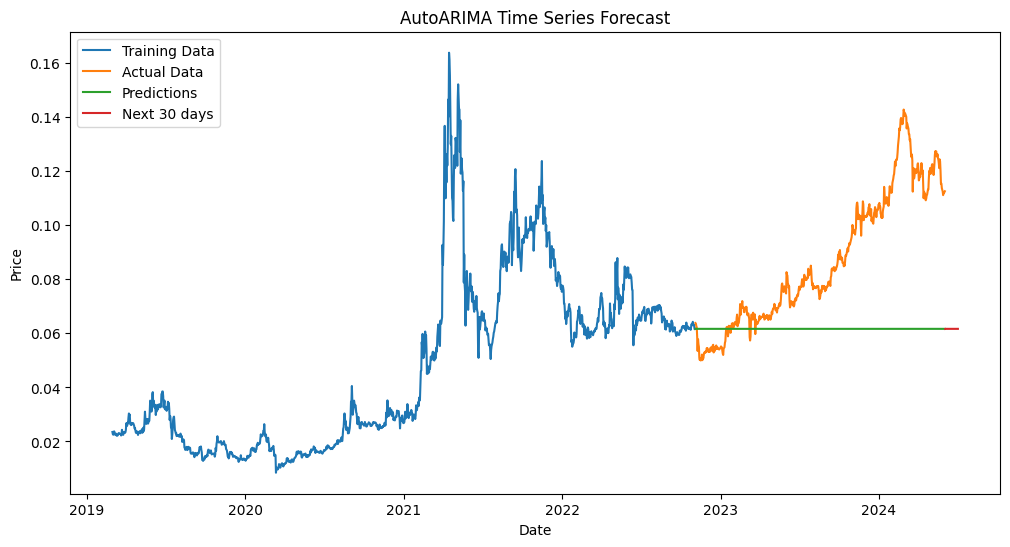

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_tron['Date'],train_data_tron['Price'], label='Training Data')
plt.plot(test_data_tron['Date'], test_data_tron['Price'], label='Actual Data')
plt.plot(test_data_tron['Date'], predictions_TRONcoin_73, label='Predictions')
plt.plot(future_data_TRONcoin_30days_73, predictions_TRONcoin_30days_73, label='Next 30 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Prediction 60 days

In [84]:
future_dates_TRONcoin_60days_73 = pd.date_range(start=TRONcoin['Date'].max(), periods=61, freq='D')[1:]
future_data_TRONcoin_60days_73 = pd.DataFrame({'Date': future_dates_TRONcoin_60days_73})
predictions_TRONcoin_60days_73 = model_TRONcoin_73.predict(n_periods=60)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


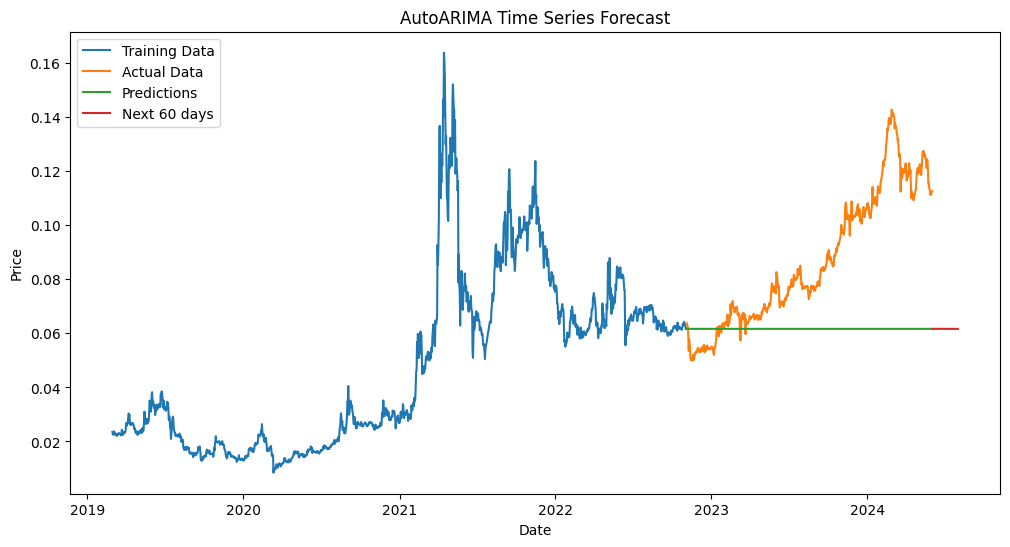

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_tron['Date'],train_data_tron['Price'], label='Training Data')
plt.plot(test_data_tron['Date'], test_data_tron['Price'], label='Actual Data')
plt.plot(test_data_tron['Date'], predictions_TRONcoin_73, label='Predictions')
plt.plot(future_data_TRONcoin_60days_73, predictions_TRONcoin_60days_73, label='Next 60 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Prediction 90 days

In [86]:
future_dates_TRONcoin_90days_73 = pd.date_range(start=TRONcoin['Date'].max(), periods=91, freq='D')[1:]
future_data_TRONcoin_90days_73 = pd.DataFrame({'Date': future_dates_TRONcoin_90days_73})
predictions_TRONcoin_90days_73 = model_TRONcoin_73.predict(n_periods=90)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


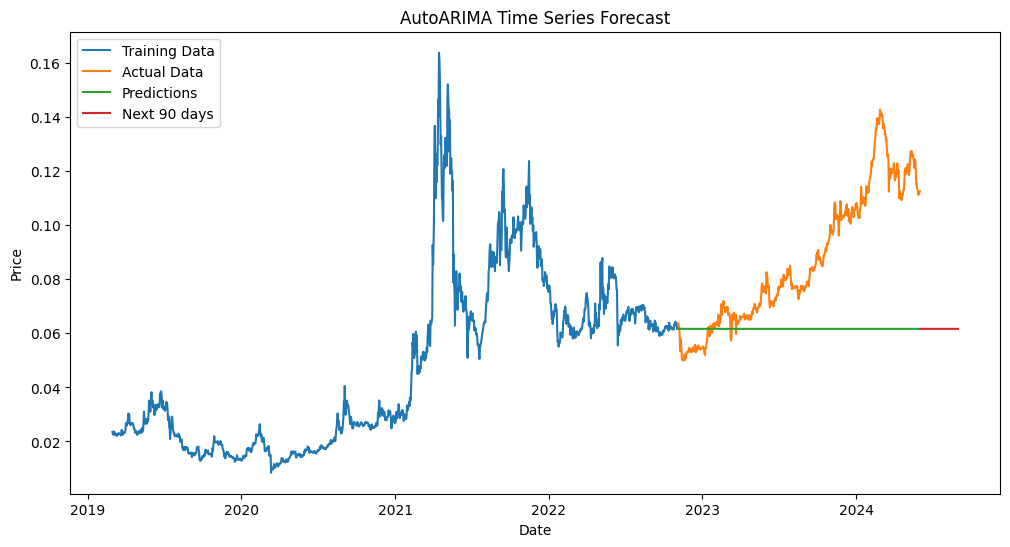

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_tron['Date'],train_data_tron['Price'], label='Training Data')
plt.plot(test_data_tron['Date'], test_data_tron['Price'], label='Actual Data')
plt.plot(test_data_tron['Date'], predictions_TRONcoin_73, label='Predictions')
plt.plot(future_data_TRONcoin_90days_73, predictions_TRONcoin_90days_73, label='Next 90 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

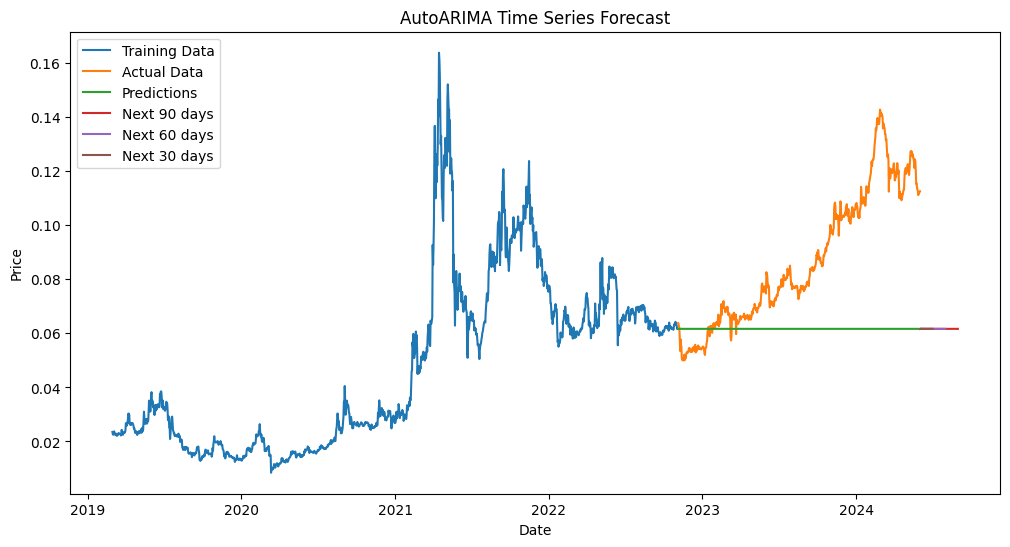

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_tron['Date'],train_data_tron['Price'], label='Training Data')
plt.plot(test_data_tron['Date'], test_data_tron['Price'], label='Actual Data')
plt.plot(test_data_tron['Date'], predictions_TRONcoin_73, label='Predictions')
plt.plot(future_data_TRONcoin_90days_73, predictions_TRONcoin_90days_73, label='Next 90 days')
plt.plot(future_data_TRONcoin_60days_73, predictions_TRONcoin_60days_73, label='Next 60 days')
plt.plot(future_data_TRONcoin_30days_73, predictions_TRONcoin_30days_73, label='Next 30 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [90]:
rmse_73 = np.sqrt(mean_squared_error(test_data_tron['Price'], predictions_TRONcoin_73))
mape_73 = mean_absolute_percentage_error(test_data_tron['Price'], predictions_TRONcoin_73) * 100
mse_73 = mean_squared_error(test_data_tron['Price'], predictions_TRONcoin_73)
print("MAPE:", mape_73)
print("RMSE:", rmse_73)
print("MSE:", mse_73)



MAPE: 26.804683479482794
RMSE: 0.035394660790319346
MSE: 0.0012527820124617695


## Devide data 9:1

In [91]:
train_data_tron = TRONcoin[:int(0.9*len(TRONcoin))]
test_data_tron = TRONcoin[int(0.9*len(TRONcoin)):]
model_TRONcoin_91 = auto_arima(train_data_tron['Price'], start_p=1, start_q=1,
                   max_p=5, max_q=5,   # m là chu kỳ mùa vụ, ở đây là mỗi năm
                   start_P=0, seasonal=False,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

model_TRONcoin_91.fit(train_data_tron['Price'])

# Prediction data file test
predictions_TRONcoin_91 = model_TRONcoin_91.predict(n_periods=len(test_data_tron))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15049.745, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15010.279, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15041.663, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15036.926, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15011.923, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-15046.829, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-15047.611, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-15047.219, Time=0.41 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-15048.659, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-15044.826, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-15051.327, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-15038.468, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-15043.199, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-15048.418, Time=0.19 sec
 ARIM

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Prediction 30 days

In [92]:
future_dates_TRONcoin_30days_91 = pd.date_range(start=TRONcoin['Date'].max(), periods=31, freq='D')[1:]
future_data_TRONcoin_30days_91 = pd.DataFrame({'Date': future_dates_TRONcoin_30days_91})
predictions_TRONcoin_30days_91 = model_TRONcoin_91.predict(n_periods=30)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


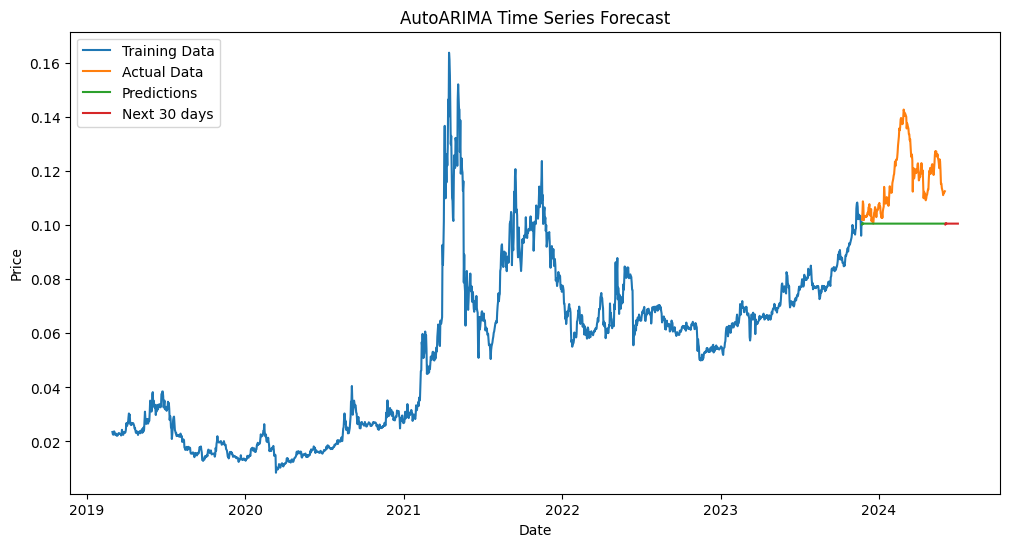

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_tron['Date'],train_data_tron['Price'], label='Training Data')
plt.plot(test_data_tron['Date'], test_data_tron['Price'], label='Actual Data')
plt.plot(test_data_tron['Date'], predictions_TRONcoin_91, label='Predictions')
plt.plot(future_data_TRONcoin_30days_91, predictions_TRONcoin_30days_91, label='Next 30 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Prediction 60 days

In [94]:
future_dates_TRONcoin_60days_91 = pd.date_range(start=TRONcoin['Date'].max(), periods=61, freq='D')[1:]
future_data_TRONcoin_60days_91 = pd.DataFrame({'Date': future_dates_TRONcoin_60days_91})
predictions_TRONcoin_60days_91 = model_TRONcoin_91.predict(n_periods=60)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


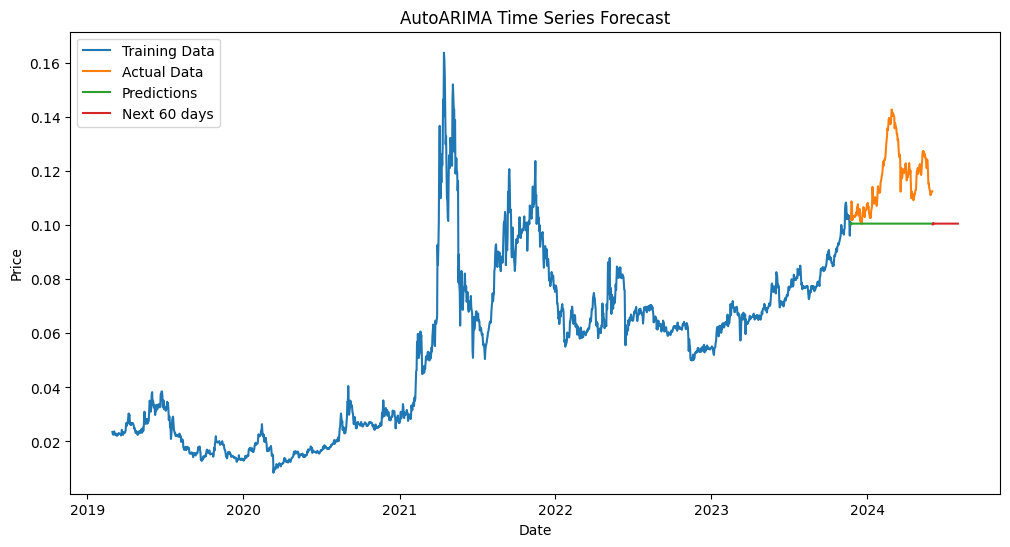

In [95]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_tron['Date'],train_data_tron['Price'], label='Training Data')
plt.plot(test_data_tron['Date'], test_data_tron['Price'], label='Actual Data')
plt.plot(test_data_tron['Date'], predictions_TRONcoin_91, label='Predictions')
plt.plot(future_data_TRONcoin_60days_91, predictions_TRONcoin_60days_91, label='Next 60 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Prediction 90 days

In [96]:
future_dates_TRONcoin_90days_91 = pd.date_range(start=TRONcoin['Date'].max(), periods=91, freq='D')[1:]
future_data_TRONcoin_90days_91 = pd.DataFrame({'Date': future_dates_TRONcoin_90days_91})
predictions_TRONcoin_90days_91 = model_TRONcoin_91.predict(n_periods=90)

c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


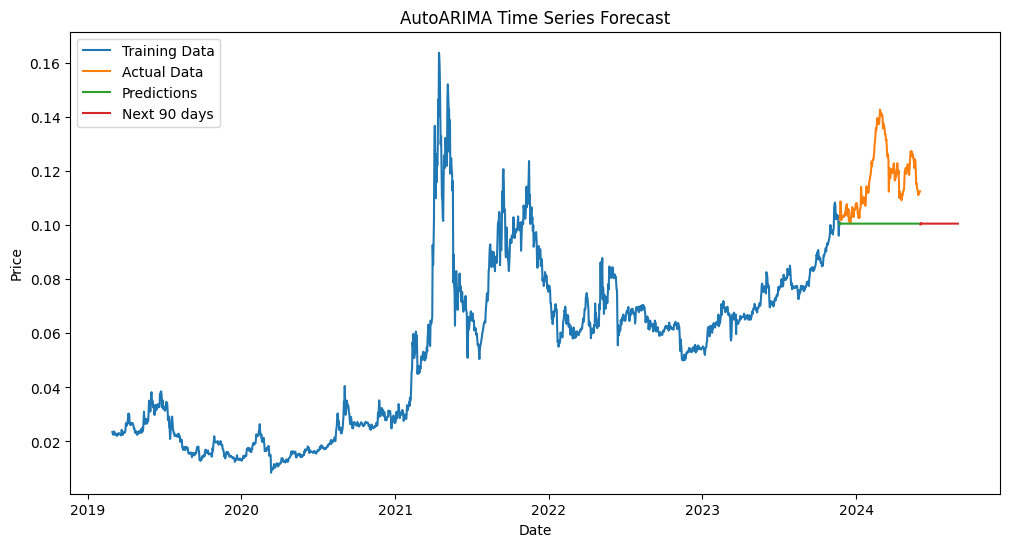

In [97]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_tron['Date'],train_data_tron['Price'], label='Training Data')
plt.plot(test_data_tron['Date'], test_data_tron['Price'], label='Actual Data')
plt.plot(test_data_tron['Date'], predictions_TRONcoin_91, label='Predictions')
plt.plot(future_data_TRONcoin_90days_91, predictions_TRONcoin_90days_91, label='Next 90 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

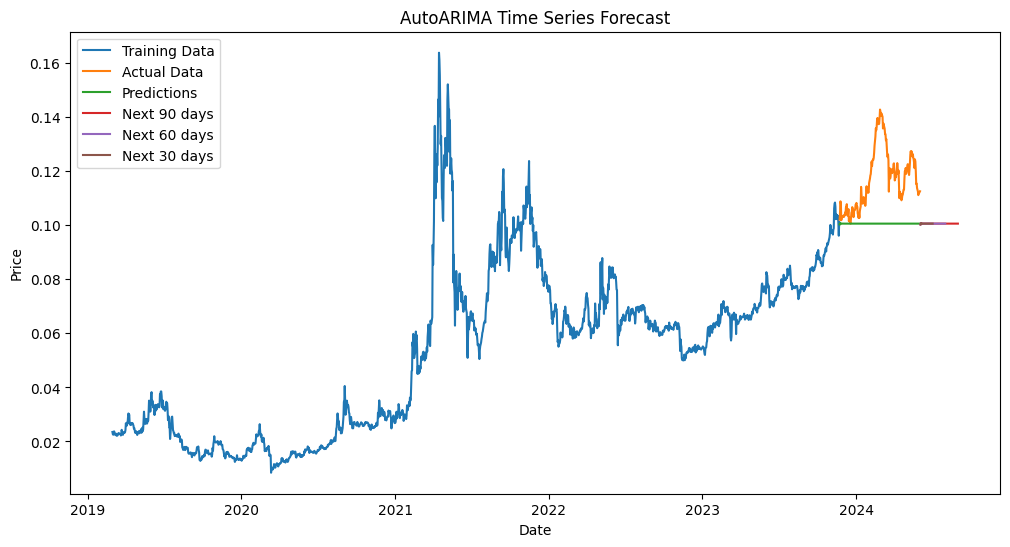

In [98]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_tron['Date'],train_data_tron['Price'], label='Training Data')
plt.plot(test_data_tron['Date'], test_data_tron['Price'], label='Actual Data')
plt.plot(test_data_tron['Date'], predictions_TRONcoin_91, label='Predictions')
plt.plot(future_data_TRONcoin_90days_91, predictions_TRONcoin_90days_91, label='Next 90 days')
plt.plot(future_data_TRONcoin_60days_91, predictions_TRONcoin_60days_91, label='Next 60 days')
plt.plot(future_data_TRONcoin_30days_91, predictions_TRONcoin_30days_91, label='Next 30 days')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [99]:
rmse_91 = np.sqrt(mean_squared_error(test_data_tron['Price'], predictions_TRONcoin_91))
mape_91 = mean_absolute_percentage_error(test_data_tron['Price'], predictions_TRONcoin_91) * 100
mse_91 = mean_squared_error(test_data_tron['Price'], predictions_TRONcoin_91)
print("MAPE:", mape_91)
print("RMSE:", rmse_91)
print("MSE:", mse_91)



MAPE: 13.422855064408587
RMSE: 0.019979047086743956
MSE: 0.00039916232249433207
